In [1]:
from pynq.overlays.base import BaseOverlay
#from pynq.lib import MicroblazeLibrary
#from pynq.lib import PynqMicroblaze
from pynq.lib import *
base = BaseOverlay('base.bit')
print('finish')

finish


In [2]:
import serial
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
a = Arduino_IO(base.ARDUINO,2,'out')

In [57]:
a.write(1)
time.sleep(0.5)
a.write(0)

In [55]:

#cap=cv2.VideoCapture(0,cv2.CAP_DSHOW)
cap=cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT,540)
cap.set(cv2.CAP_PROP_FRAME_WIDTH,960)


print(type(image))

#x,y = input("\n\nx,y:").split(",")

"""
for i in range(1,9,1):
    for j in range(1,9,1):
        print(i,j,j+i-1)
        x,y = i-1,j-1
        image2 = faceDetection.getArea(image,(x,y))
        plt.subplot(8,8,i+8*(j-1)).imshow(image2[:,:,::-1])
plt.show()
"""

def getArea(image,position):
        wLen=len(image[0])
        hLen=len(image)
        
        x1 = int(position[1]*hLen/9)
        x2 = int((position[1]+1)*hLen/9)
        
        y1 = int(position[0]*wLen/9)
        y2 = int((position[0]+1)*wLen/9)
        print(x1,x2,y1,y2)
        return image[x1:x2,y1:y2]

    
#cv2.imshow("image",image)
def main(image,reqArea,totalReqArea):

    ser = serial.Serial()
    ser.baudrate = 9600
    ser.port = "/dev/ttyUSB0"
    ser.open()
    count = 0
    l2 = []
    while True:
        i,j = 0,0
        l = []
        while i<8:
            while j<8:
                data = ser.read()
                try:
                    val = int(int.from_bytes(data,"big"))
                    if val > 100:
                        #print(f"\r{data}")
                        pass
                    l.append(val)
                except:
                    j-=1
                j+=1
            i+=1
        l2.append(l)
        count+=1

        if count == 8:
            #print(l2)
            highArea = []
            for y in range(len(l2)):
                for x in range(len(l2[y])):
                    if l2[y][x] >= 27:
                        print(x,y)
                        highArea.append((x,y))
            avg = 0
            for i in reqArea:
                avg+=l2[i[1]][i[0]]
            avg =avg / totalReqArea
            print(avg)
            
            l2 = []
            count = 0

            for i in range(1,9,1):
                for j in range(1,9,1):
                    if (i,j) in highArea:
                        image2 = getArea(image,(i,j))
                        plt.subplot(8,8,i+8*(j-1)).imshow(image2[:,:,::-1])

            if avg > 25 and avg < 37:
                a.write(1)
                time.sleep(1)
                a.write(0)
               
                
            plt.show()
            break

print('finish')

<class 'NoneType'>
finish


NF
NF
NF
NF
NF
0 0
3 0
5 0
26.875
NF
NF
NF
NF
0 0
3 0
5 0
29.458333333333332
NF
0 0
3 0
5 0
41.166666666666664
NF
NF
NF
NF
NF
NF
NF
NF
0 1
1 1
4 1
6 1
30.0
60 120 106 213
60 120 426 533
60 120 640 746


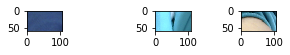

NF
NF
NF
NF
NF
NF
NF
NF
0 0
3 0
5 0
66.0
NF
NF
0 0
3 0
5 0
25.88888888888889
NF
0 0
3 0
5 0
27.0
NF
0 0
3 0
5 0
28.0
NF
0 1
1 1
4 1
6 1
24.791666666666668
60 120 106 213
60 120 426 533
60 120 640 746


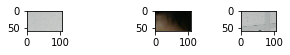

NF
0 0
3 0
5 0
23.5
NF
NF
0 0
3 0
5 0
25.6
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
0 0
3 0
5 0
24.933333333333334
NF
0 0
3 0
5 0
27.25
NF
1 1
4 1
6 1
41.0
60 120 106 213
60 120 426 533
60 120 640 746


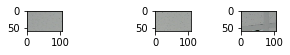

NF
0 0
3 0
5 0
26.458333333333332
NF
0 0
3 0
5 0
24.71875
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
0 0
3 0
5 0
50.75
NF
0 0
3 0
5 0
25.75
NF
0 0
3 0
5 0
24.11111111111111
NF
NF
0 0
3 0
5 0
24.708333333333332
NF
NF
NF
NF
NF
NF
NF
NF
0 1
1 1
4 1
6 1
27.475
60 120 106 213
60 120 426 533
60 120 640 746


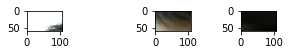

NF
0 0
3 0
5 0
22.7
NF
0 0
3 0
5 0
23.714285714285715
NF
NF
NF
NF
0 0
3 0
5 0
24.65
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
1 1
4 1
6 1
15.5
60 120 106 213
60 120 426 533
60 120 640 746


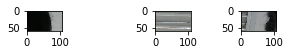

NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
0 1
1 1
4 1
6 1
16.5
60 120 106 213
60 120 426 533
60 120 640 746


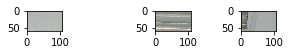

NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
0 0
3 0
5 0
90.5
NF
NF
NF
NF
NF
NF
NF
NF
NF
0 0
3 0
5 0
40.166666666666664
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
0 0
3 0
5 0
50.75
NF
0 0
3 0
5 0
50.75
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
0 0
3 0
5 0
27.733333333333334
NF
NF
0 1
1 1
4 1
6 1
31.791666666666668
60 120 106 213
60 120 426 533
60 120 640 746


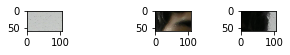

NF
0 0
3 0
5 0
26.055555555555557
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
0 0
3 0
5 0
40.166666666666664
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
0 0
3 0
5 0
24.833333333333332
NF
NF
NF
0 0
3 0
5 0
25.208333333333332
NF
0 0
3 0
5 0
26.95
NF
NF
NF
NF
0 0
3 0
5 0
27.066666666666666
NF
0 0
3 0
5 0
38.5
0 0
3 0
5 0
25.35
NF
0 0
3 0
5 0
24.9
NF
0 0
3 0
5 0
25.75
NF
0 0
3 0
5 0
27.583333333333332
NF
NF
0 0
3 0
5 0
28.583333333333332
NF
0 0
3 0
5 0
27.15
NF
0 0
3 0
5 0
26.916666666666668
NF
NF
NF
NF
0 1
1 1
4 1
6 1
26.5
60 120 106 213
60 120 426 533
60 120 640 746


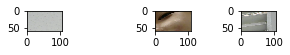

NF
0 0
3 0
5 0
26.291666666666668
NF
0 0
3 0
5 0
27.15
NF
0 0
3 0
5 0
25.8
NF
0 0
3 0
5 0
24.666666666666668
NF
0 0
3 0
5 0
25.133333333333333
NF
0 0
3 0
5 0
26.666666666666668
NF
NF
1 1
4 1
6 1
24.055555555555557
60 120 106 213
60 120 426 533
60 120 640 746


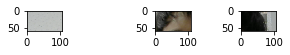

NF
0 0
3 0
5 0
24.291666666666668
NF
0 1
1 1
4 1
6 1
37.4
60 120 106 213
60 120 426 533
60 120 640 746


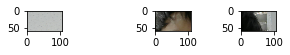

NF
0 0
3 0
5 0
29.4
NF
0 0
3 0
5 0
24.8
NF
NF
NF
NF
0 0
3 0
5 0
27.4
NF
NF
0 0
3 0
5 0
39.833333333333336
NF
NF
NF
0 0
3 0
5 0
33.125
NF
0 0
3 0
5 0
90.5
NF
1 1
4 1
6 1
28.916666666666668
60 120 106 213
60 120 426 533
60 120 640 746


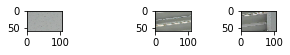

NF
NF
0 1
1 1
4 1
6 1
30.416666666666668
60 120 106 213
60 120 426 533
60 120 640 746


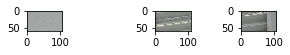

NF
0 0
3 0
5 0
24.2
NF
NF
0 0
3 0
5 0
27.0
NF
NF
1 1
4 1
6 1
26.266666666666666
60 120 106 213
60 120 426 533
60 120 640 746


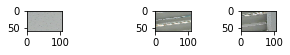

NF
0 0
3 0
5 0
26.8
NF
0 0
3 0
5 0
26.533333333333335
NF
0 0
3 0
5 0
23.61111111111111
NF
0 0
3 0
5 0
24.266666666666666
NF
NF
NF
0 0
3 0
5 0
30.555555555555557
NF
0 0
3 0
5 0
39.833333333333336
NF
0 0
3 0
5 0
25.666666666666668
0 0
3 0
5 0
50.75
NF
0 1
1 1
4 1
6 1
28.95
60 120 106 213
60 120 426 533
60 120 640 746


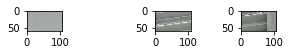

0 0
3 0
5 0
50.25
NF
NF
0 0
3 0
5 0
24.133333333333333
NF
0 1
1 1
4 1
6 1
27.3
60 120 106 213
60 120 426 533
60 120 640 746


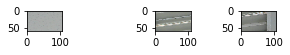

NF
0 0
3 0
5 0
26.25
NF
0 0
3 0
5 0
25.733333333333334
NF
0 0
3 0
5 0
26.8
NF
0 0
3 0
5 0
26.333333333333332
NF
0 1
1 1
4 1
6 1
33.733333333333334
60 120 106 213
60 120 426 533
60 120 640 746


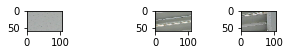

NF
0 0
3 0
5 0
25.5
NF
0 1
1 1
4 1
6 1
28.266666666666666
60 120 106 213
60 120 426 533
60 120 640 746


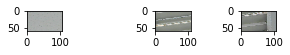

NF
NF
0 0
3 0
5 0
26.35
NF
0 0
3 0
5 0
25.1
NF
0 0
3 0
5 0
25.583333333333332
NF
0 0
3 0
5 0
32.5
NF
0 0
3 0
5 0
27.166666666666668
NF
0 0
3 0
5 0
25.933333333333334
NF
0 0
3 0
5 0
26.0
NF
0 0
3 0
5 0
26.666666666666668
NF
0 0
3 0
5 0
25.933333333333334
NF
0 0
3 0
5 0
22.88888888888889
NF
0 1
1 1
4 1
6 1
30.533333333333335
60 120 106 213
60 120 426 533
60 120 640 746


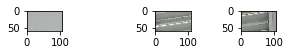

NF
NF
NF
NF
NF
0 0
3 0
5 0
28.65
NF
NF
NF
0 0
3 0
5 0
51.25
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
0 0
3 0
5 0
40.5
NF
NF
NF
NF
NF
0 0
3 0
5 0
91.0
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
0 0
3 0
53.0
NF
0 0
3 0
41.833333333333336
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
0 0
3 0
24.214285714285715
NF
0 0
3 0
26.333333333333332
NF
0 0
3 0
26.266666666666666
NF
NF
0 0
3 0
26.866666666666667
NF
0 0
3 0
26.25
NF
0 0
3 0
25.444444444444443
NF
0 0
3 0
27.416666666666668
NF
0 0
3 0
25.666666666666668
NF
NF
NF
0 0
3 0
26.6
NF
0 0
3 0
28.666666666666668
NF
0 0
3 0
5 0
27.066666666666666
NF
0 0
3 0
5 0
28.25
NF
NF
0 0
3 0
26.6
NF
NF
NF
NF
NF
NF
0 1
1 1
4 1
132.0
60 

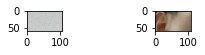

NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
0 0
3 0
24.107142857142858
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
NF
0 0
3 0
24.642857142857142
NF


KeyboardInterrupt: 

In [56]:
# Load the cascade
face_cascade = cv2.CascadeClassifier('/home/xilinx/jupyter_notebooks/base/video/data/'
        'haarcascade_frontalface_default.xml')

while True:
    sus,image = cap.read()
    

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    if len(faces)>0:
        for (x, y, w, h) in faces:
            x_min_pos = int(x/960*8)
            y_min_pos = int(y/540*8)
            x_max_pos = int((x+w)/960*8)
            y_max_pos = int((y+h)/540*8)
            x_block_count = x_max_pos-x_min_pos+1
            y_block_count = y_max_pos-y_min_pos+1
            reqArea = []
            for i in range(y_block_count):
                for j in range(x_block_count):
                    reqArea.append((j,i))
            main(image,reqArea,x_block_count*y_block_count)

    print('NF')
    
plt.imshow(img[:,:,::-1])

cap.release()

In [46]:
ser = serial.Serial()
ser.baudrate = 9600
ser.port = "/dev/ttyUSB0"
ser.open()
count = 0
l2 = []
while True:
    i,j = 0,0
    l = []
    while i<8:
        while j<8:
            data = ser.read()
            try:
                val = int(int.from_bytes(data,"big"))
                #print(f"{data}",end="")
                if val < 100:
                    l.append(val)
            except:
                j-=1
            j+=1
        i+=1
    l2.append(l)
  

    if count == 8:
        print(l2)
        highArea = []
        for y in range(len(l2)):
            for x in range(len(l2[y])):
                if l2[y][x] >= 26:
                    #print(x,y)
                    highArea.append((x,y))
        #print(highArea)
        l2 = []
        count = 0
        count+=1
#         avg = l2[4][4]+l2[4][5]+l2[5][4]+l2[5][5]/4
#         print(avg)


KeyboardInterrupt: 

In [15]:
ser.close()